
Data has three different varieties of grains:

To construct the data, seven geometric parameters (features) of grains were measured:

* area A,
* perimeter P,
* compactness C = 4*pi*A/P^2,
* length of kernel,
* width of kernel,
* asymmetry coefficient
* length of kernel groove.
* target (abba-0, massa-1 , indian-2)
* Massa-Largest, Abba-Avg, Indian-smallest

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA:**

In [4]:
data = pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/grains.csv')
data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Let's see our data's information:

In [ ]:
data['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

In [ ]:
df0=data[data['target']==0]
df1=data[data['target']==1]
df2=data[data['target']==2]
df0.shape,df1.shape,df2.shape

((70, 8), (70, 8), (70, 8))

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(df0['C'],df1['C'],df2['C'])

F_onewayResult(statistic=75.86904843622993, pvalue=1.920699928455352e-25)

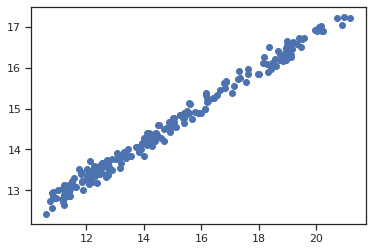

In [ ]:
plt.scatter(data['A'],data['P'])

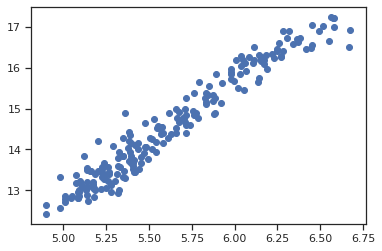

In [ ]:
plt.scatter(data['LK'],data['P'])

In [ ]:
data.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [ ]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


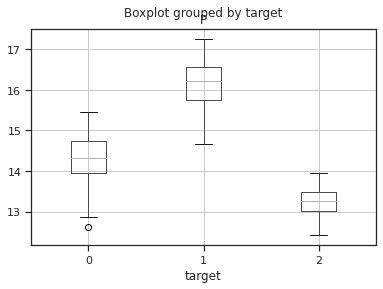

In [ ]:
data.boxplot(column='P',by='target')

**Let's check the correlations between the features :**

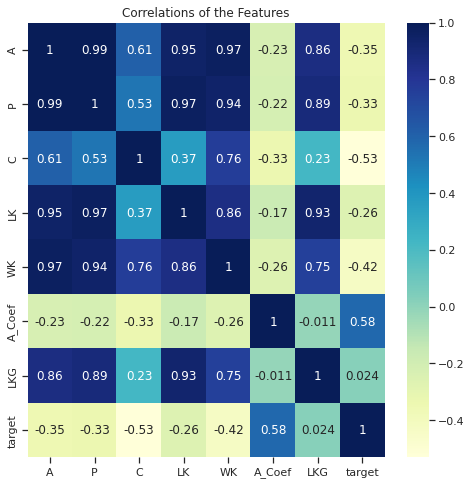

In [ ]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

Let's see how many target classes we have in our data:

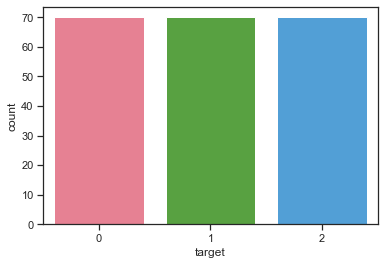

In [ ]:
sns.countplot(data['target'], palette='husl')
plt.show()

**So, we have equally separeted 70 x 3 classes of grain's in our data.**

**Let's visualize all the features using a pairplot:**

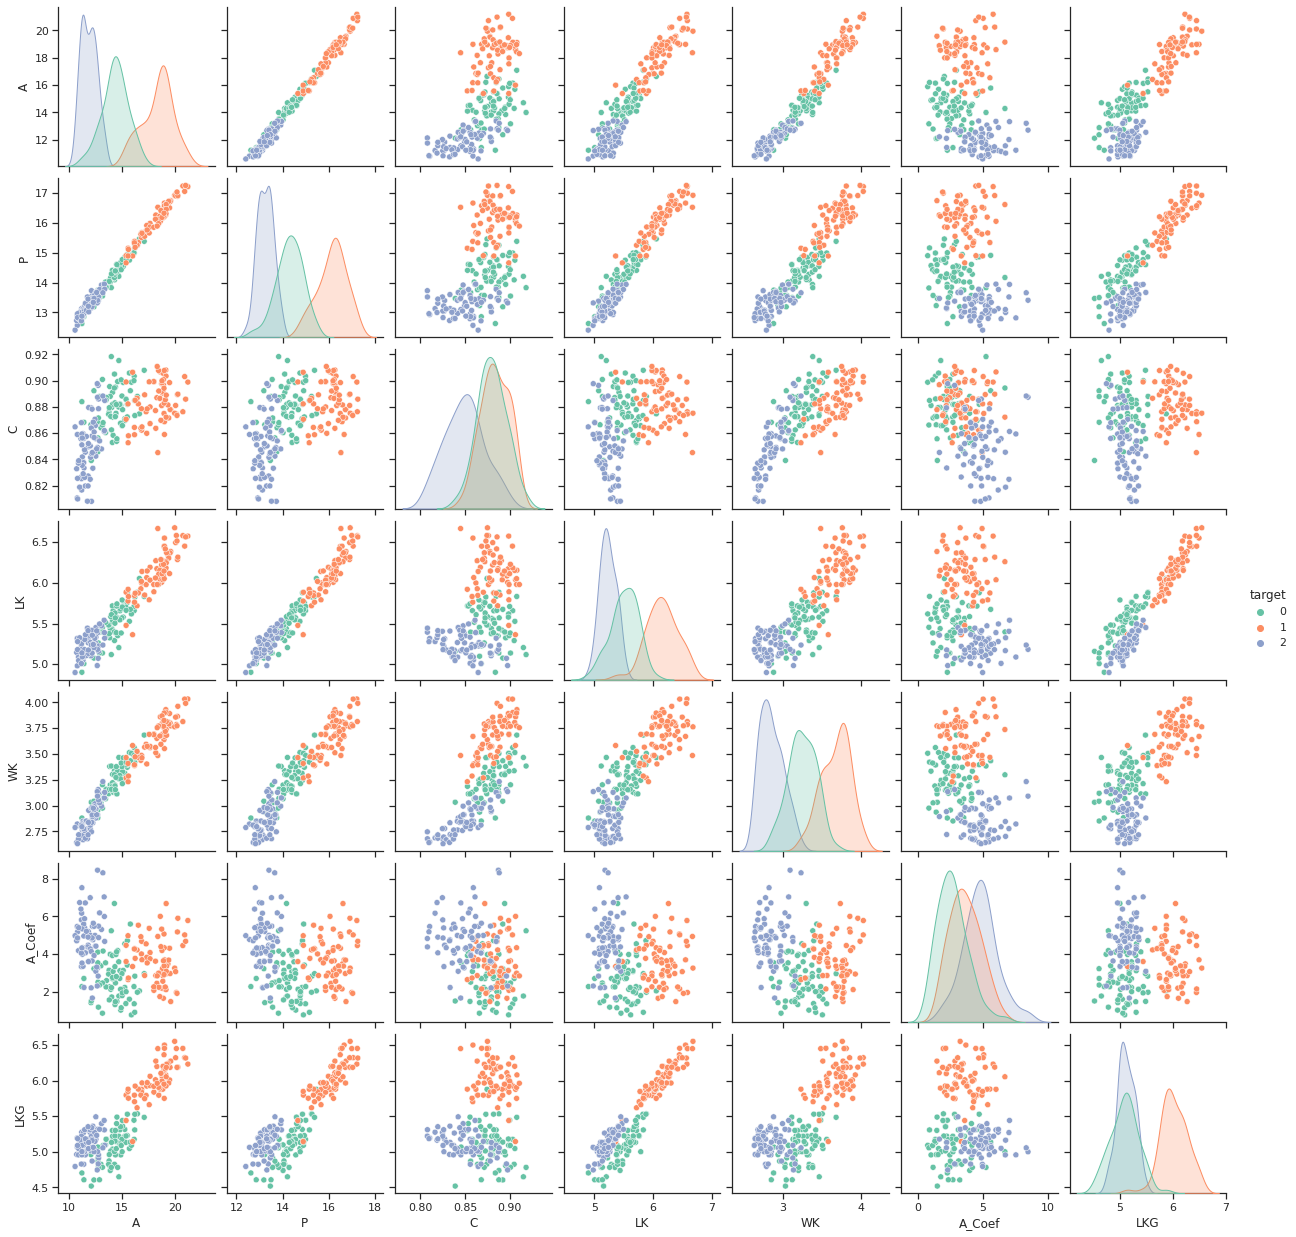

In [ ]:
sns.pairplot(data, vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'],hue='target',palette='Set2')
plt.show()

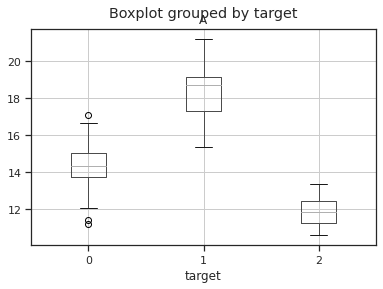

In [ ]:
data.boxplot(column='A',by='target')

In [ ]:
data.columns

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
from sklearn.preprocessing import StandardScaler
X=data.drop(['target'],axis=1)
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std_df=pd.DataFrame(X_std)

In [10]:
X_std_df.columns=X.columns

In [11]:
X_std_df.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [12]:
Y=data['target']

In [ ]:
X_std_df.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [ ]:
X_std_df.head(10)

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
5,-0.161062,-0.268094,1.022413,-0.548709,0.141702,-0.825482,-0.922013
6,-0.054267,-0.053180,0.377610,-0.148263,0.001049,-0.076135,-0.385617
7,-0.254076,-0.352525,0.852728,-0.471787,0.115164,-0.666813,-0.832274
8,0.614062,0.691344,0.157019,0.960316,0.547738,-1.106821,0.956394
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796


In [ ]:
x0=X_std_df.loc[:1]
x0

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013


In [ ]:
x1=X_std_df.loc[74:75]
x1

,0,1,2,3,4,5,6
74,0.679517,0.729721,0.322462,0.878869,0.603468,0.202536,0.882971
75,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153


In [ ]:
x2=X_std_df.loc[145:146]
x2

,0,1,2,3,4,5,6
145,-1.253124,-1.097049,-2.303414,-0.790786,-1.516941,1.645896,-0.271403
146,-1.177335,-1.097049,-1.590736,-1.023814,-1.432019,-0.986152,-0.563056


In [ ]:
df_small=pd.concat([x0,x1,x2],ignore_index=True)
df_small

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,0.679517,0.729721,0.322462,0.878869,0.603468,0.202536,0.882971
3,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
4,-1.253124,-1.097049,-2.303414,-0.790786,-1.516941,1.645896,-0.271403
5,-1.177335,-1.097049,-1.590736,-1.023814,-1.432019,-0.986152,-0.563056


In [ ]:
np.sqrt(np.sum(np.square(df_small.loc[4]-df_small.loc[5])))

2.754614612216079

In [ ]:
c0=np.mean(df_small.loc[:1],axis=0)

In [ ]:
np.sum((df_small.loc[0]-c0)**2)+np.sum((df_small.loc[1]-c0)**2)

0.7017427347441934

In [ ]:
from scipy.spatial.distance import pdist

In [ ]:
pdist(df_small)

array([1.18468792, 2.05372844, 2.36322058, 4.45709696, 3.20416957,
       3.07594602, 3.47808743, 5.08190767, 3.29698784, 0.91706974,
       4.96660521, 4.65968895, 4.38785097, 4.50365926, 2.75461461])

**We can easily see the three target classes from our pairplot above.**

**Now we are going to visualize each feature. But in order to see the differences between the classes, we are going to show three boxplots for each feature. Each boxplot will show us the corresponding target class' values.**

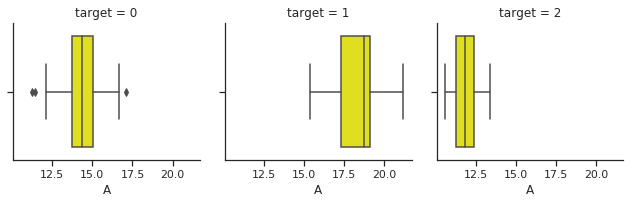

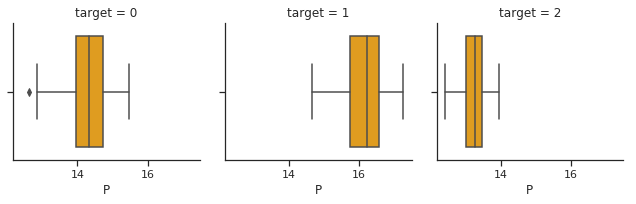

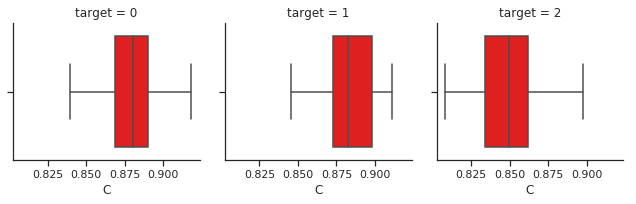

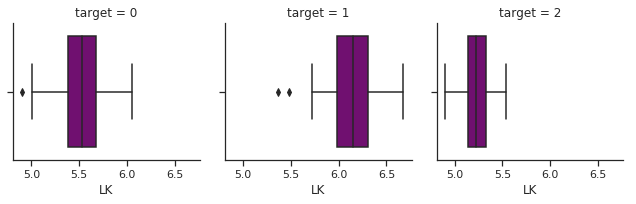

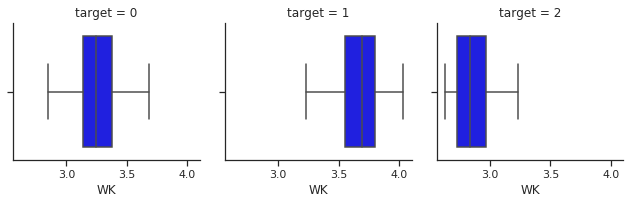

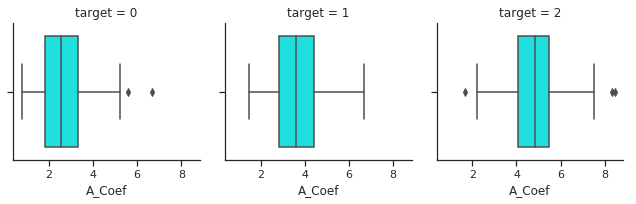

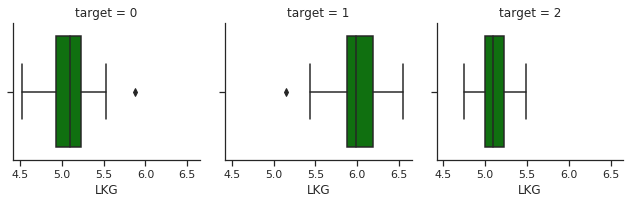

In [ ]:
a = sns.FacetGrid(data, col='target')
a.map(sns.boxplot, 'A', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='target')
p.map(sns.boxplot, 'P', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='target')
c.map(sns.boxplot, 'C', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='target')
lk.map(sns.boxplot, 'LK', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='target')
wk.map(sns.boxplot, 'WK', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='target')
acoef.map(sns.boxplot, 'A_Coef', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='target')
lkg.map(sns.boxplot, 'LKG', color='green', order=['0', '1', '2'])

In [ ]:
data['A_Coef'][70:140].describe()

count    70.000000
mean      3.644800
std       1.181868
min       1.472000
25%       2.845500
50%       3.609500
75%       4.436000
max       6.682000
Name: A_Coef, dtype: float64

**As an example: from the graph above, we have three boxplots showing LKG feature values according to three classes.** 
* If our  grain has a LKG value around 4.9-5.2 it belongs to target 0, 
* If it's around 5.9-6.2 it belongs to target 1, 
* And finally if it's around 5.0-5.3 it belongs to target 2.

**CREATING THE DATA SET:**

Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

In [18]:
plt.rcParams['figure.figsize'] = [15,8]

In [19]:
from sklearn.cluster import KMeans

inertia = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,n_init=20)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)
    
# Visualization of k values:

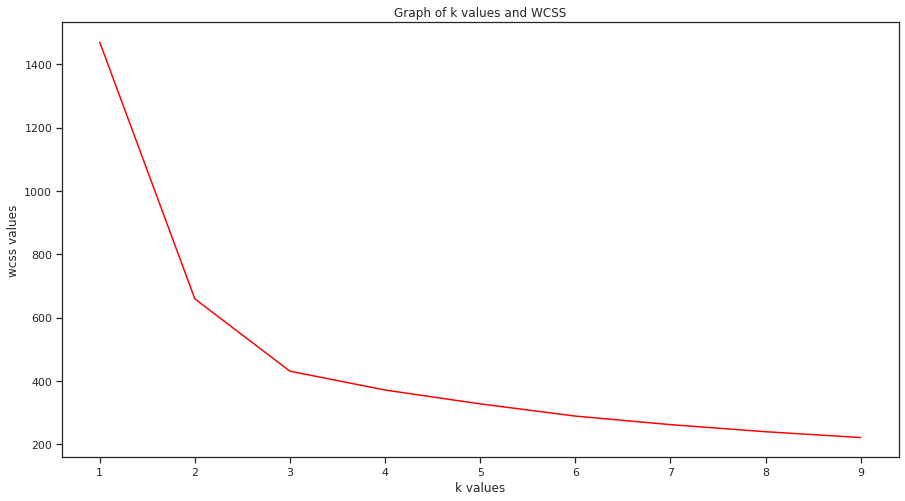

In [20]:
plt.plot(range(1,10), inertia, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We already know that our data set has three classes. 

Bu if we didn't know how many classes we have in our data set, we sould use this method. 

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

Understanding PCA

In [ ]:
#consider an input vector
v_in=np.array([2,1])
#Let us consider a transformation matrix
mat=[[3,-2],[-1,4]]
v_out=np.dot(mat,v_in)
v_out  

array([4, 2])

We can notice the vector v_in got scaled without any rotation. Any vector that is only scaled by a matrix is called an eigenvector of that matrix. And how much the vector is scaled we call the eigenvalue. In our case the eigenvalue is 2 since the original vector doubled its length.

In [60]:
cov_matrix = np.cov(X_std.T)
cov_matrix.shape

(7, 7)

In [ ]:
cov_matrix

array([[ 1.00478469,  0.99909854,  0.61119889,  0.9545308 ,  0.97541544,
        -0.23067077,  0.86782525],
       [ 0.99909854,  1.00478469,  0.53177587,  0.97707507,  0.94935008,
        -0.21838028,  0.89504603],
       [ 0.61119889,  0.53177587,  1.00478469,  0.36967551,  0.7652787 ,
        -0.33305686,  0.22791011],
       [ 0.9545308 ,  0.97707507,  0.36967551,  1.00478469,  0.86453176,
        -0.1723833 ,  0.93726927],
       [ 0.97541544,  0.94935008,  0.7652787 ,  0.86453176,  1.00478469,
        -0.25927117,  0.75271583],
       [-0.23067077, -0.21838028, -0.33305686, -0.1723833 , -0.25927117,
         1.00478469, -0.01113203],
       [ 0.86782525,  0.89504603,  0.22791011,  0.93726927,  0.75271583,
        -0.01113203,  1.00478469]])

In [61]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vecs

array([[ 0.44447352,  0.02656355, -0.02587094,  0.19363997,  0.20441167,
        -0.73480569, -0.42643686],
       [ 0.44157147,  0.08400282,  0.05983912,  0.29545659,  0.17427591,
         0.67075153, -0.47623853],
       [ 0.27701737, -0.52915125, -0.62969178, -0.3328164 , -0.33265481,
         0.0725527 , -0.14162884],
       [ 0.42356333,  0.20597518,  0.21187966,  0.26340659, -0.76609839,
        -0.04627605,  0.27357647],
       [ 0.43281866, -0.11668963, -0.21648338,  0.19963039,  0.46536555,
         0.03928908,  0.70301171],
       [-0.11869248,  0.71688203, -0.67950584,  0.09246481, -0.03625822,
         0.00372346, -0.01964186],
       [ 0.38716084,  0.37719327,  0.2138972 , -0.80414995,  0.11134657,
         0.0344981 ,  0.04282974]])

In [ ]:
eig_vecs[:,0]

array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
       -0.11869248,  0.38716084])

In [ ]:
type(eig_vecs)

numpy.ndarray

In [62]:
eig_vals

array([5.05527392e+00, 1.20330286e+00, 6.81247474e-01, 6.86915798e-02,
       1.88031478e-02, 8.16283865e-04, 5.35755786e-03])

In [63]:
5.05527392/(np.sum(eig_vals))

0.7187430267210887

In [64]:
1.20330286/(np.sum(eig_vals))

0.17108183519727896

In [ ]:
6.81247474e-01/(np.sum(eig_vals))

0.09685763405850344

In [ ]:
6.86915798e-02/(np.sum(eig_vals))

0.009766353862721093

In [ ]:
1.88031478e-02/(np.sum(eig_vals))

0.00267337271442177

In [68]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(5.0552739189200375,
  array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
         -0.11869248,  0.38716084])),
 (1.2033028605929328,
  array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
          0.71688203,  0.37719327])),
 (0.6812474741717415,
  array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
         -0.67950584,  0.2138972 ])),
 (0.0686915797528358,
  array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
          0.09246481, -0.80414995])),
 (0.018803147801790973,
  array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
         -0.03625822,  0.11134657])),
 (0.0008162838654995111,
  array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
          0.00372346,  0.0344981 ])),
 (0.005357557861667026,
  array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
         -0.01964186,  0.04282974]))]

In [69]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(5.0552739189200375,
  array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
         -0.11869248,  0.38716084])),
 (1.2033028605929328,
  array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
          0.71688203,  0.37719327])),
 (0.6812474741717415,
  array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
         -0.67950584,  0.2138972 ])),
 (0.0686915797528358,
  array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
          0.09246481, -0.80414995])),
 (0.018803147801790973,
  array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
         -0.03625822,  0.11134657])),
 (0.005357557861667026,
  array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
         -0.01964186,  0.04282974])),
 (0.0008162838654995111,
  array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
          0.00372346,  0.0344981 ]))]

In [65]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance Explained", var_exp)


Cumulative Variance Explained [ 71.87430266  88.98248618  98.66824959  99.64488498  99.91222225
  99.98839433 100.        ]
Variance Explained [71.8743026567543, 17.108183528158026, 9.68576340829211, 0.9766353856015433, 0.2673372714676404, 0.07617208116247677, 0.011605668563904617]


In [70]:
plt.rcParams['figure.figsize'] = [15,8]

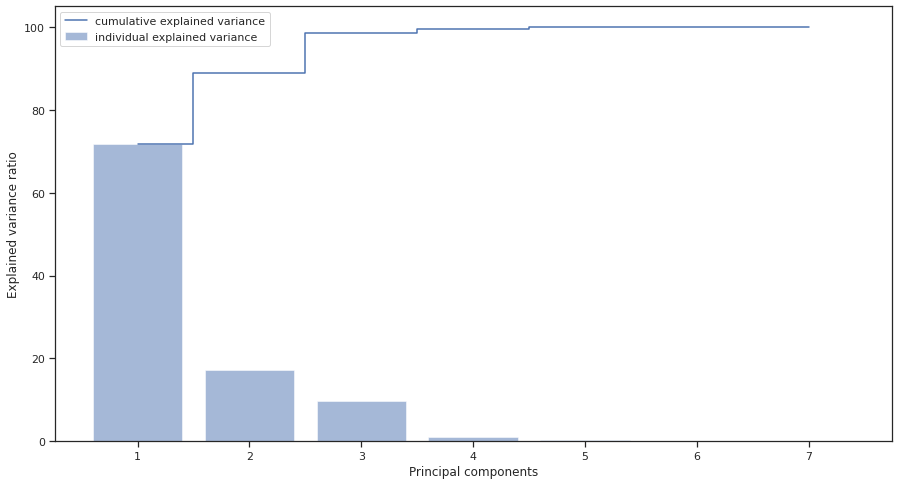

In [71]:
plt.bar(range(1,8), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


In [72]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 

In [73]:
eigvalues_sort

[5.0552739189200375,
 1.2033028605929328,
 0.6812474741717415,
 0.0686915797528358,
 0.018803147801790973,
 0.005357557861667026,
 0.0008162838654995111]

In [74]:
eigvectors_sort

[array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
        -0.11869248,  0.38716084]),
 array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
         0.71688203,  0.37719327]),
 array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
        -0.67950584,  0.2138972 ]),
 array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
         0.09246481, -0.80414995]),
 array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
        -0.03625822,  0.11134657]),
 array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
        -0.01964186,  0.04282974]),
 array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
         0.00372346,  0.0344981 ])]

In [120]:
P_reduce = np.array(eigvectors_sort[0:4]).transpose()
P_reduce

array([[ 0.44447352,  0.02656355, -0.02587094,  0.19363997],
       [ 0.44157147,  0.08400282,  0.05983912,  0.29545659],
       [ 0.27701737, -0.52915125, -0.62969178, -0.3328164 ],
       [ 0.42356333,  0.20597518,  0.21187966,  0.26340659],
       [ 0.43281866, -0.11668963, -0.21648338,  0.19963039],
       [-0.11869248,  0.71688203, -0.67950584,  0.09246481],
       [ 0.38716084,  0.37719327,  0.2138972 , -0.80414995]])

In [121]:
# Let's project our feature space data into PC domain
X_pca = np.dot(X_std,P_reduce) #210 x 7 DOT 7 x 7
X_pca.shape

(210, 4)

In [ ]:
#construct a supervised model
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.model_selection import cross_val_score,KFold

In [129]:
LR=LogisticRegression()
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
print('Bias_error:',np.mean(scores))
print('Var_error:',np.std(scores,ddof=1))

Bias_error: 0.9281796706481097
Var_error: 0.014262348131209803


In [122]:
X_pca.shape

(210, 4)

In [128]:
scores=cross_val_score(LR,X_pca,Y,cv=kf,scoring='f1_weighted')
print('Bias_error:',np.mean(scores))
print('Var_error:',np.std(scores,ddof=1))

Bias_error: 0.9232068791278255
Var_error: 0.008278764837404078


In [124]:
(0.014262348131209803-0.008278764837404078)/0.014262348131209803

0.4195370382743678

In [127]:
(0.07679312087217456-0.07182032935189024)/0.07679312087217456

0.06475568988219328

In [ ]:
((0.014262348131209803-0.008278764837404078)/0.014262348131209803)*100

41.953703827436776

In [ ]:
((0.07679312087217456-0.07182032935189024)/0.07679312087217456)*100

6.475568988219329

In [ ]:
scores

array([0.9136811 , 0.92727506, 0.92866447])

In [ ]:
#Relative difference with max normalization
((0.07679312087217456-0.07182032935189024)/0.07679312087217456)*100

6.475568988219329

In [ ]:
((0.014262348131209803-0.008278764837404078)/0.014262348131209803)*100

41.953703827436776

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(m1,X_std,Y,cv=kf,scoring='accuracy')
print('Bias_error:',np.mean(scores))
print('Var_error:',np.std(scores,ddof=1))

Bias_error: 0.39999999999999997
Var_error: 0.43985155195259007


In [ ]:
scores

array([0.02857143, 0.28571429, 0.88571429])

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_pca,Y,cv=kf)
print('Bias_error:',np.mean(scores))
print('Var_error:',np.std(scores,ddof=1))

Bias_error: 0.8999999999999999
Var_error: 0.01428571428571429


In [ ]:
((0.014262348131209803-0.008278764837404078)/0.014262348131209803)*100

41.953703827436776

In [ ]:
((0.07679312087217456-0.07182032935189024)/0.07679312087217456)*100

6.475568988219329

In [ ]:
X_pca[0,:]

array([ 0.31704705, -0.78366902,  0.63101001,  0.41684594, -0.10749566,
        0.02257049,  0.01469664])

In [ ]:
np.set_printoptions(suppress=True)
print(X_std[:5,:])

[[ 0.14209777  0.21546244  0.0000606   0.3042182   0.14170182 -0.98615174
  -0.38357742]
 [ 0.01118803  0.00822376  0.42851527 -0.16862466  0.19743223 -1.7881662
  -0.92201349]
 [-0.19206658 -0.36020056  1.44238325 -0.76363745  0.20804754 -0.66747933
  -1.18919199]
 [-0.34709127 -0.47533316  1.03938133 -0.68897805  0.31950836 -0.96081795
  -1.2299826 ]
 [ 0.44525718  0.33059504  1.37450924  0.06666556  0.80515903 -1.56349549
  -0.4753563 ]]


In [ ]:
X_pca[:5,:]

array([[ 0.31704705, -0.78366902,  0.63101001,  0.41684594, -0.10749566],
       [-0.00338618, -1.91321367,  0.66975446,  0.43307058,  0.04440642],
       [-0.45944334, -1.90722525, -0.93248882,  0.11129161, -0.0082219 ],
       [-0.59193565, -1.93106922, -0.49931092,  0.2289766 ,  0.07485254],
       [ 1.10291005, -2.06809003, -0.05670541,  0.14242065,  0.01877457]])

**K-Means Clustering Algorithm:**

In [30]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
m1 = KMeans(n_clusters=3,n_init=15,random_state=2)

In [31]:
m1.fit(X_std)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [23]:
m1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [24]:
m1.cluster_centers_

array([[ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311]])

In [25]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(X))
centroid_df

,A,P,C,LK,WK,A_Coef,LKG
0,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809
2,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893


In [ ]:
#L0- Bigger grain/L2-average/L1-smallest

In [ ]:
#L0- Massa group, L2-Abba group, L1-Indian group

In [32]:
m1.inertia_

430.6589731513006

In [33]:
from sklearn import metrics
metrics.silhouette_score(X_std,m1.labels_)

0.40072705527512986

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

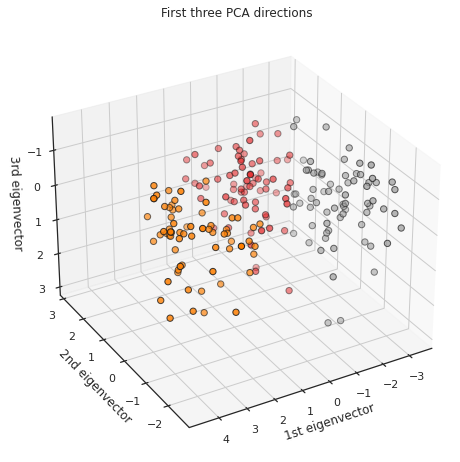

In [101]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=120)
X_pca = PCA(n_components=5).fit_transform(X_std) #210 x7
ax.scatter(X_pca[:,0], X_pca[:, 1],X_pca[:,2], c=m3.labels_,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
#ax.w_zaxis.set_ticklabels([])

plt.show()

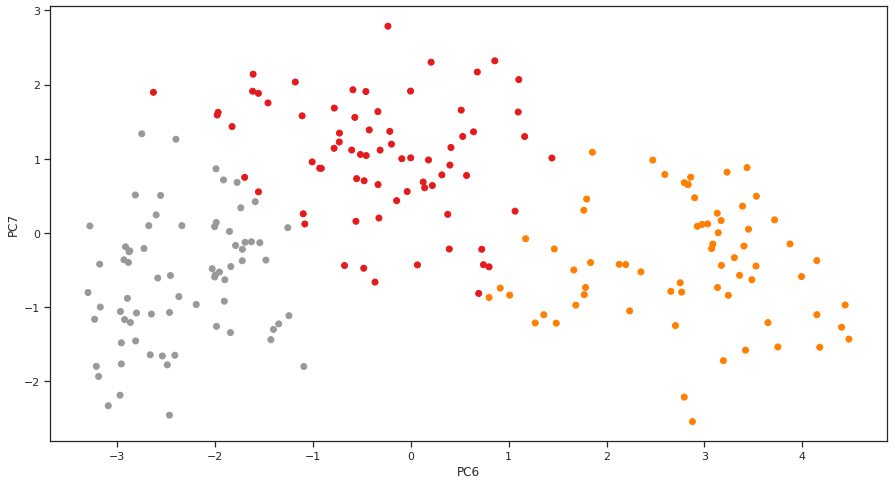

In [106]:
# Plot the training points (scatter plot of PC1 and PC2 dimensions only),edgecolor='k'
plt.scatter(X_pca[:,0], X_pca[:,1], c=m3.labels_, cmap=plt.cm.Set1)
plt.xlabel('PC6')
plt.ylabel('PC7')
plt.show()

In [97]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
m3 = KMeans(n_clusters=3,n_init=15,random_state=2)
m3.fit(X_pca)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [98]:
m3.inertia_

270.3316934585105

In [ ]:
m1.inertia_

430.6589731513006

In [99]:
from sklearn import metrics
metrics.silhouette_score(X_pca,m3.labels_)

0.49343048696031894

In [81]:
centroids=m3.cluster_centers_
centroid_df = pd.DataFrame(centroids) #,columns = list(X_std_df)
centroid_df.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
centroid_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.805258,0.416900,0.007343,-0.055116,0.029645,-0.002473,-0.003392
1,-2.344180,0.602847,0.013051,-0.062270,0.022709,0.006230,-0.008260
2,-0.270019,-1.004751,-0.020163,0.115158,-0.051004,-0.003984,0.011578


In [ ]:
#Centroid of Label-0, indicates Large size grain (Massa)
#Centroid of Label-1, indicates Average size grain (Abba)
#Centroid of Label-2, indicates small size grain (Indian)


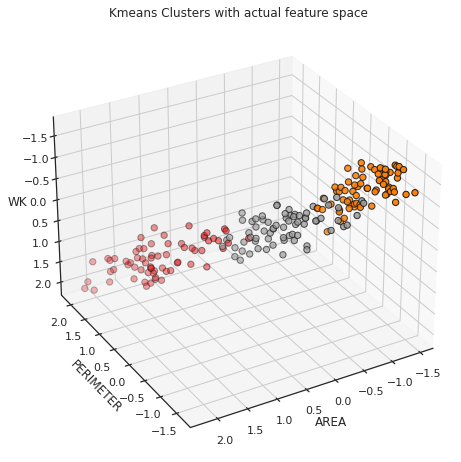

In [36]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=120)
ax.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 4], c=m1.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel("AREA")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PERIMETER")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("WK")
#ax.w_zaxis.set_ticklabels([])

plt.show()

In [38]:
#3D plot using Plotly
import plotly.express as px
fig = px.scatter_3d(X_std_df, x='A', y='P', z='WK',color=m1.labels_)
fig.show()

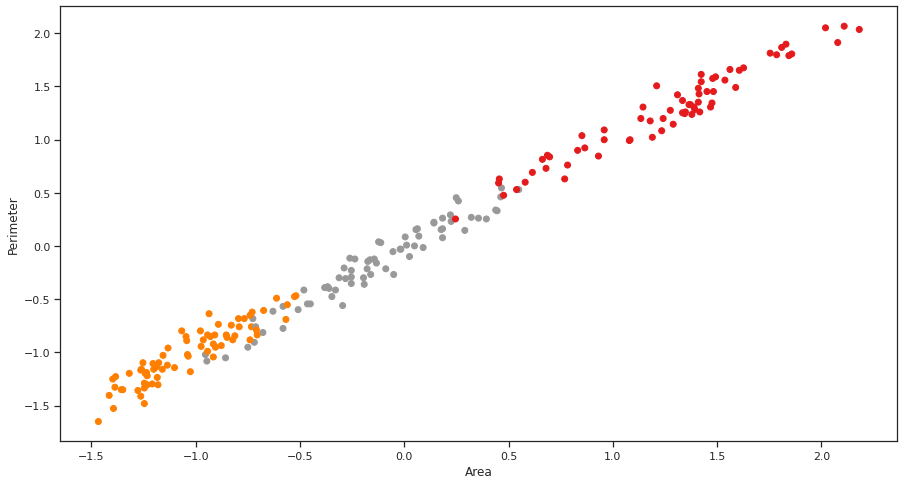

In [34]:
# 2D scatter plot with Kmeans labels
plt.scatter(X_std[:, 0], X_std[:, 1], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

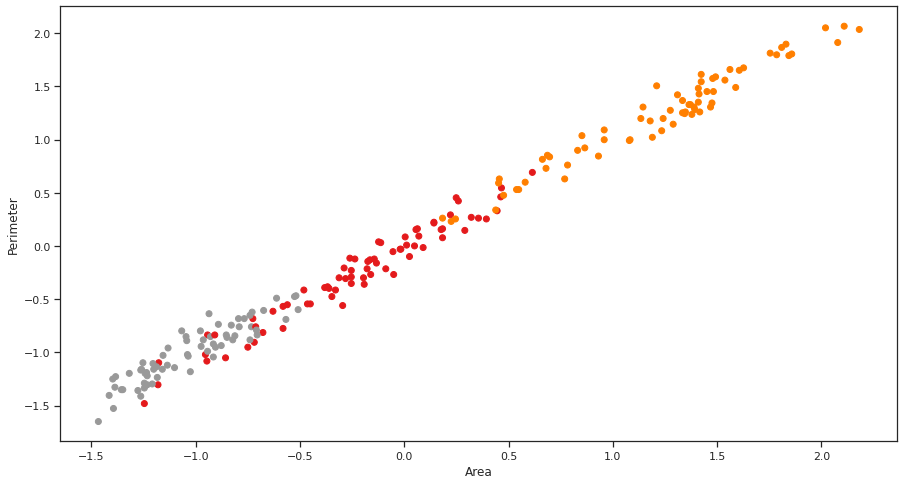

In [ ]:
# 2D scatter plot with AGC labels
plt.scatter(X_std[:, 0], X_std[:, 1], c=m2.labels_, cmap=plt.cm.Set1)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

In [ ]:
# Adding a label feature with the predicted class values:
X_copy = X_std_df.copy(deep=True)
X_copy['label'] = m3.labels_

In [ ]:
X_copy['label'].value_counts()

0    72
2    71
1    67
Name: label, dtype: int64

In [ ]:
df0=X_copy[X_copy['label']==0]
df1=X_copy[X_copy['label']==1]
df2=X_copy[X_copy['label']==2]

In [ ]:
df0.describe()

,A,P,C,LK,WK,A_Coef,LKG,label
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,-0.156468,-0.188248,0.451022,-0.277063,-0.012368,-0.665977,-0.597728,0.0
std,0.384147,0.429403,0.653081,0.531747,0.424805,0.779526,0.555047,0.0
min,-1.246235,-1.480825,-0.776248,-1.643713,-1.007406,-1.956769,-1.637889,0.0
25%,-0.362594,-0.413929,0.019150,-0.578686,-0.276276,-1.160155,-0.922013,0.0
50%,-0.152449,-0.137611,0.464573,-0.213873,-0.018855,-0.724480,-0.584471,0.0
75%,0.142098,0.154058,0.925904,0.124923,0.315528,-0.246805,-0.331060,0.0
max,0.548607,0.545509,2.006586,0.659416,0.858236,1.989902,0.960473,0.0


In [ ]:
df1.describe()

,A,P,C,LK,WK,A_Coef,LKG,label
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,1.0
std,0.439968,0.419420,0.632804,0.538016,0.440572,0.807383,0.468207,0.0
min,0.245448,0.253840,-1.094408,0.202410,0.340739,-1.485494,0.154859,1.0
25%,0.944781,0.994526,0.154898,0.866426,0.811794,-0.568144,0.960473,1.0
50%,1.344400,1.282358,0.504874,1.186557,1.221810,-0.054135,1.225612,1.0
75%,1.480478,1.551001,1.147556,1.582478,1.458001,0.480541,1.599866,1.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,1.0


In [ ]:
df2.describe()

,A,P,C,LK,WK,A_Coef,LKG,label
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,-1.027211,-0.999970,-0.986263,-0.887178,-1.086685,0.718029,-0.613355,2.0
std,0.246635,0.268584,0.832665,0.310351,0.370558,0.887668,0.365075,0.0
min,-1.466714,-1.649686,-2.668236,-1.650501,-1.668209,-1.465494,-1.813288,2.0
25%,-1.234177,-1.196831,-1.548315,-1.099605,-1.397519,0.232870,-0.829215,2.0
50%,-1.039535,-0.989592,-0.971386,-0.910694,-1.121521,0.749880,-0.650756,2.0
75%,-0.839725,-0.816893,-0.419910,-0.649386,-0.773869,1.176887,-0.371340,2.0
max,-0.519341,-0.467658,0.733948,-0.198036,-0.070604,3.170590,0.169135,2.0


In [ ]:
data['A_Coef'].std()

1.5035571308217794

In [ ]:
np.std(data['A_Coef'],ddof=1)

1.5035571308217794

In [ ]:
np.std([20,25,40,35,30],ddof=1)

7.905694150420948

In [ ]:
np.mean([20,25,40,35,30])

30.0

In [ ]:
np.std([80,75,60,65,70],ddof=1)

7.905694150420948

In [39]:
from sklearn.cluster import AgglomerativeClustering 
m2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
#other distance options like manhattan and cosine can go well with single,complete & avg
m2.fit(X_std_df)

AgglomerativeClustering(n_clusters=3)

In [40]:
m2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
metrics.silhouette_score(X_std,m2.labels_)

0.3926339709101015

In [ ]:
L=pd.DataFrame(m2.labels_)
L[0].value_counts()

0    77
1    68
2    65
Name: 0, dtype: int64

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_std,m2.labels_) #AGC

0.3926339709101015

In [5]:
import numpy as np
fd=np.array([0.5,.428,1.0,.25,.625,.375,.714,.833,.667,.2,.77,1.0,.428,.667,.33,1.0,.8,.85,.77,.37,.75])
dd_max=np.array([.77,.428,1.0,.25,.77,.428,.77,1.0,.77,.2,.77,1.0,.428,.77,.33,1.0,1.0,1.0,.77,.428,.77])
dd_min=np.array([.5,.37,0.8,.25,.5,.37,.5,0.8,.5,.2,.5,.8,.37,.5,.33,.8,.8,.8,.5,.37,.5])
dd_avg=np.array([0.6828,0.4002,.9625,.25,.6828,.4002,.6828,.9625,.6828,.2,.6828,.9625,.4002,.6828,.33,.9625,.9625,.9625,.6828,.4002,.6828])
len(fd),len(dd_max)

(21, 21)

In [6]:
np.corrcoef(fd,dd_max)

array([[1.        , 0.95458126],
       [0.95458126, 1.        ]])

In [7]:
np.corrcoef(fd,dd_min)

array([[1.        , 0.92050555],
       [0.92050555, 1.        ]])

In [8]:
np.corrcoef(fd,dd_avg)

array([[1.        , 0.95444644],
       [0.95444644, 1.        ]])

In [ ]:
len(fd)

21

In [ ]:
X_std.shape

(210, 7)

In [ ]:
np.corrcoef(fd,dd_max)

array([[1.        , 0.95458126],
       [0.95458126, 1.        ]])

In [ ]:
np.corrcoef(fd,dd_min)

array([[1.        , 0.92050555],
       [0.92050555, 1.        ]])

In [ ]:
np.corrcoef(fd,dd_avg)

array([[1.        , 0.95444644],
       [0.95444644, 1.        ]])

In [17]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation 
#between the distance of points in feature space and 
#distance on dendrogram
# closer it is to 1, the better is the clustering
#min or single | max or complete | 
Z = linkage(X_std, 'ward')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.7285528540866004

In [ ]:
coph_dists

array([7.13728225, 7.13728225, 7.13728225, ..., 6.49872499, 3.89833267,
       6.49872499])

In [ ]:
X_std_df.head()

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [ ]:
m2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
p=[2,5,6,9]
q=p
q

[2, 5, 6, 9]

In [ ]:
q[0]=100
q

[100, 5, 6, 9]

In [ ]:
p

[100, 5, 6, 9]

In [46]:
# Adding a label feature with the predicted class values:
X_std_df_labeled = X_std_df.copy(deep=True)
X_std_df_labeled['class'] = m2.labels_

In [47]:
X_std_df_labeled[X_std_df_labeled['class']==0].describe()

,A,P,C,LK,WK,A_Coef,LKG,class
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,-0.223402,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,0.0
std,0.424055,0.460837,0.736981,0.544972,0.476240,0.745622,0.562715,0.0
min,-1.246235,-1.480825,-1.590736,-1.643713,-1.432019,-1.956769,-1.813288,0.0
25%,-0.464221,-0.544413,-0.127203,-0.627893,-0.343949,-1.272824,-1.093334,0.0
50%,-0.178287,-0.214366,0.364883,-0.281745,-0.099797,-0.797482,-0.634440,0.0
75%,0.062863,0.084979,0.903633,0.066666,0.298278,-0.376141,-0.383577,0.0
max,0.614062,0.691344,2.006586,0.960316,0.858236,1.989902,0.960473,0.0


In [48]:
X_std_df_labeled[X_std_df_labeled['class']==1].describe()

,A,P,C,LK,WK,A_Coef,LKG,class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,1.213983,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,1.0
std,0.475834,0.459975,0.626451,0.556385,0.464178,0.805529,0.512191,0.0
min,0.183438,0.230813,-1.094408,0.182048,0.024933,-1.485494,0.071238,1.0
25%,0.855211,0.904339,0.157019,0.793464,0.784592,-0.569811,0.956394,1.0
50%,1.334065,1.267007,0.549416,1.176376,1.154138,-0.047468,1.169525,1.0
75%,1.477894,1.533731,1.154979,1.546279,1.449376,0.506042,1.590178,1.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,1.0


In [49]:
X_std_df_labeled[X_std_df_labeled['class']==2].describe()

,A,P,C,LK,WK,A_Coef,LKG,class
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,-1.024932,-0.999559,-0.972589,-0.881418,-1.088249,0.832836,-0.583025,2.0
std,0.253499,0.271212,0.861629,0.307883,0.378344,0.780462,0.320110,0.0
min,-1.466714,-1.649686,-2.668236,-1.650501,-1.668209,-0.412141,-1.252417,2.0
25%,-1.239345,-1.196831,-1.552557,-1.099605,-1.400173,0.277871,-0.828195,2.0
50%,-1.039535,-0.989592,-0.928965,-0.888070,-1.129482,0.771213,-0.646677,2.0
75%,-0.825945,-0.797704,-0.419910,-0.677666,-0.773869,1.180221,-0.328510,2.0
max,-0.509006,-0.467658,0.733948,-0.198036,-0.070604,3.170590,0.169135,2.0


In [ ]:
X_std_df_labeled['class'].value_counts()

0    73
1    70
2    67
Name: class, dtype: int64

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_std,m2.labels_)

0.39263397091010155

In [ ]:
#Df0=X_std_df_labeled[X_std_df_labeled['class']==0]

In [50]:
AGC_clusters = X_std_df_labeled.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [51]:
Df0.shape,Df1.shape,Df2.shape

((73, 8), (70, 8), (67, 8))

In [ ]:
Df2.head()

,A,P,C,LK,WK,A_Coef,LKG,class
19,-0.732931,-0.759327,-0.101750,-0.910694,-0.556255,0.267871,-1.007674,2
69,-0.729486,-0.621168,-1.068955,-0.489886,-0.999445,-0.111469,-0.695626,2
140,-0.612356,-0.490684,-0.975628,-0.354142,-0.702216,1.069219,-0.026660,2
141,-0.526231,-0.475333,-0.411426,-0.198036,-0.492563,2.223239,0.065119,2
142,-0.519341,-0.467658,-0.381731,-0.541922,-0.489909,1.529894,-0.206138,2


In [52]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())
C2=np.array(Df2.mean())

In [53]:
C0

array([-0.22340186, -0.25000973,  0.34750811, -0.34004066, -0.08532778,
       -0.72535983, -0.65651131,  0.        ])

In [54]:
C0=C0[:-1]
C0 #Abba group

array([-0.22340186, -0.25000973,  0.34750811, -0.34004066, -0.08532778,
       -0.72535983, -0.65651131])

In [55]:
C1=C1[:-1]
C1 #Massa group

array([ 1.21398281,  1.21744501,  0.56850541,  1.19825643,  1.13059428,
       -0.04069661,  1.24268596])

In [56]:
C2=C2[:-1]
C2 #Indian group

array([-1.02493226, -0.99955881, -0.97258911, -0.88141764, -1.08824882,
        0.83283627, -0.58302525])

In [57]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [ ]:
AGC_I0,AGC_I1,AGC_I2

(167.8847944002123, 156.40073947816484, 120.76351448951594)

In [58]:
AGC_I0+AGC_I1+AGC_I2 #compared to KMeans cluster, AGC clusters are less homogeneous

445.0490483678931

In [ ]:
m1.inertia_

430.65897315130053

In [ ]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(X_std,m1.labels_)

0.40072705527512986

In [ ]:
metrics.silhouette_score(X_std,m1.labels_)

0.4007270552751299

In [ ]:
X_std_df_labeled.loc[60]

A        -1.180780
P        -1.304288
C        -0.114477
LK       -1.403898
WK       -1.084367
A_Coef   -0.666813
LKG      -1.633810
class     0.000000
Name: 60, dtype: float64

In [ ]:
X_std_df.shape

(210, 7)

In [ ]:
,truncate_mode='level',p=5,color_threshold=10

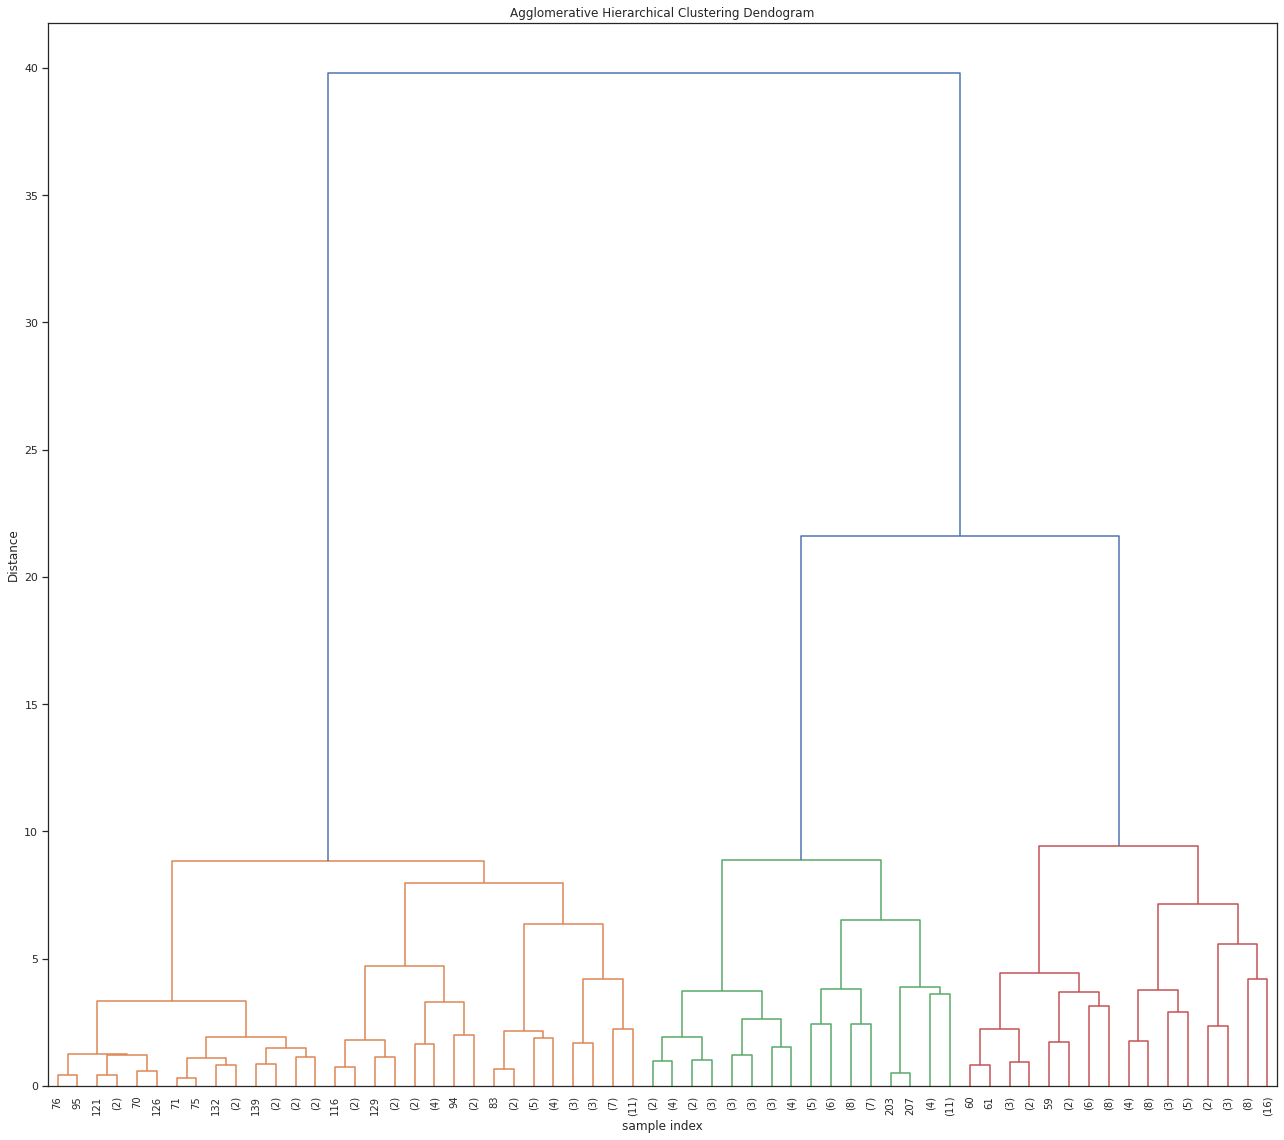

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
#Z = linkage(X_std_df,method='average',metric='cityblock')
Z = linkage(X_std_df,method='ward',metric='euclidean')
dendrogram(Z,leaf_font_size=10,leaf_rotation=90.0,truncate_mode='level',p=5,color_threshold=10)
plt.tight_layout()

In [ ]:
X_std_df_labeled.loc[76]

0        0.851766
1        1.036742
2       -0.470815
3        0.985202
4        0.383200
5        0.082534
6        1.048173
class    1.000000
Name: 76, dtype: float64

In [ ]:
#Sub cluster analysis

In [ ]:
Df1.head()

,0,1,2,3,4,5,6,class
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796,1
35,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,1
37,0.769087,0.629940,1.565405,0.460324,1.126272,-0.496143,0.154859,1
43,0.224778,0.230813,0.466694,0.562132,0.364623,0.673878,0.244598,1
70,0.958561,1.090470,-0.156898,1.272528,0.802505,0.250537,1.329628,1


In [ ]:
Df1=Df1.drop('class',axis=1)

In [ ]:
Df1.shape

(70, 7)

In [ ]:
agc_sub = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
agc_sub.fit(Df1)

AgglomerativeClustering()

In [ ]:
agc_sub.labels_

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1])

In [ ]:
Df1_copy=Df1.copy(deep=True)
Df1_copy['labels']=agc_sub.labels_

In [ ]:
Df1_copy.head(5)

,0,1,2,3,4,5,6,labels
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796,0
35,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,0
37,0.769087,0.629940,1.565405,0.460324,1.126272,-0.496143,0.154859,0
43,0.224778,0.230813,0.466694,0.562132,0.364623,0.673878,0.244598,1
70,0.958561,1.090470,-0.156898,1.272528,0.802505,0.250537,1.329628,1


In [ ]:
messa_0=Df1_copy[Df1_copy['labels']==0]
messa_0.describe()

,0,1,2,3,4,5,6,labels
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1.415462,1.389213,0.745760,1.356193,1.336497,-0.198713,1.361701,0.0
std,0.355921,0.377675,0.608363,0.538229,0.343938,0.869484,0.527301,0.0
min,0.438367,0.338271,-1.094408,0.182048,0.600814,-1.485494,0.071238,0.0
25%,1.258276,1.240143,0.294888,0.993121,1.132907,-0.957818,1.027778,0.0
50%,1.409855,1.351437,0.780612,1.353975,1.359809,-0.424808,1.405091,0.0
75%,1.575215,1.631593,1.198461,1.745371,1.545577,0.413873,1.685526,0.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,0.0


In [ ]:
messa_1=Df1_copy[Df1_copy['labels']==1]
messa_1.describe()

,0,1,2,3,4,5,6,labels
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.673171,0.756384,0.092718,0.774322,0.577907,0.383452,0.923225,1.0
std,0.303816,0.326872,0.385116,0.348691,0.234068,0.355961,0.292280,0.0
min,0.183438,0.230813,-0.517479,0.202410,0.024933,-0.116136,0.244598,1.0
25%,0.465927,0.560860,-0.271435,0.554214,0.389835,0.064201,0.789153,1.0
50%,0.679517,0.814152,0.224893,0.790635,0.566314,0.377206,0.956394,1.0
75%,0.858656,0.959987,0.424273,0.979546,0.805159,0.604544,1.101201,1.0
max,1.309950,1.420517,0.661832,1.485194,0.890082,1.221221,1.415289,1.0


In [ ]:
messa_0.shape

(51, 8)

In [ ]:
messa_1.shape

(19, 8)

In [ ]:
messa_0_cent=np.array(np.mean(messa_0.iloc[:,:-1]))
messa_1_cent=np.array(np.mean(messa_1.iloc[:,:-1]))

In [ ]:
messa_0_cent[:-1]

array([ 1.41546184,  1.38921295,  0.74575971,  1.35619265,  1.3364972 ,
       -0.19871271,  1.36170085])

In [ ]:
messa_1_cent[:-1]

array([0.67317068, 0.75638367, 0.09271755, 0.77432236, 0.57790748,
       0.38345189, 0.92322494])

In [ ]:
messa_0_in=0
messa_1_in=0
for i in np.arange(messa_0.shape[0]):
  messa_0_in=messa_0_in+np.sum((messa_0.iloc[i,:-1]-messa_0_cent)**2)
for i in np.arange(messa_1.shape[0]):
  messa_1_in=messa_1_in+np.sum((messa_1.iloc[i,:-1]-messa_1_cent)**2)


In [ ]:
messa_0_in+messa_1_in

117.32039794275475

In [ ]:
grain_AGC_labeled.loc[76]

NameError: ignored

In [ ]:
grain_AGC_labeled.loc[203]

A        -0.739821
P        -0.882135
C         0.695769
LK       -1.007977
WK       -0.444794
A_Coef    3.170590
LKG      -0.832274
label     2.000000
Name: 203, dtype: float64

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

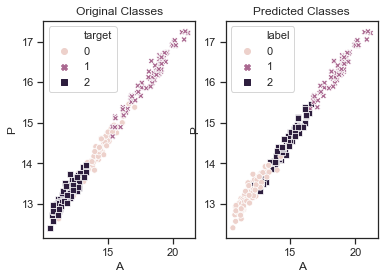

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [ ]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

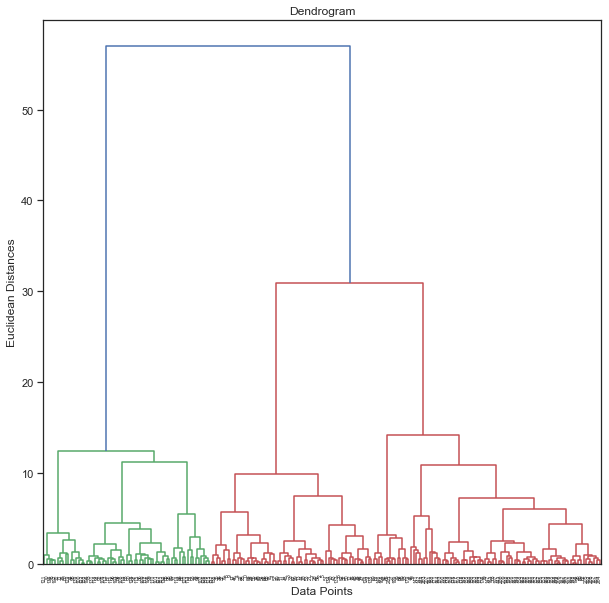

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**From the dendrogram we can read there are 3 classes in our data set.**

**Hierarchical Clustering Algorithm:**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')


**Comparing Original, K-Means and Hierarchical Clustered Classes:**

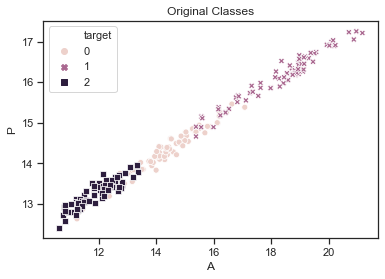

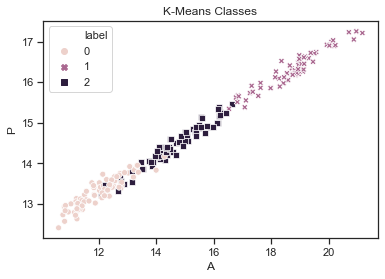

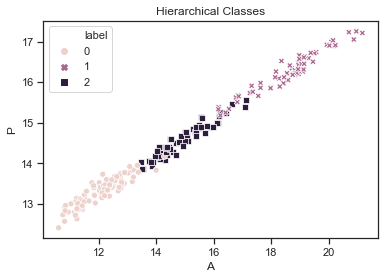

In [ ]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [ ]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.



## Build An Classification model :-

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
LR=LogisticRegression()
NB=GaussianNB()

* m1 model object is fitted with X_pca 
* km model object is fitted with X_std


For Supervised Classification Model comparision, we have taken Labels returned by X_pca by KMeans Clustering

In [108]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
values=model_selection.cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
print(values)
b_e=np.mean(1-values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)


[0.9136811  0.94219344 0.92866447]
Bias_error: 0.07182032935189024
VE: 0.014262348131209803


In [ ]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
values=model_selection.cross_val_score(NB,X_std,m1.labels_,cv=kf,scoring='f1_weighted')
print(values)
b_e=np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.94354993 0.95673743 0.9568888 ]
Bias_error: 0.952392053091421
VE: 0.007657878697417208


In [ ]:
np.std([80,90,82],ddof=1)

5.291502622129181

In [ ]:
np.std([20,10,18],ddof=1)

5.291502622129181

In [ ]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
f1_score=model_selection.cross_val_score(m1,X_std,m1.labels_,cv=kf,scoring='f1_weighted')
print(f1_score)
b_e=np.mean(f1_score)
v_e=np.std(f1_score,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)


[0.39176999 0.28406593 0.91421927]
Bias_error: 0.5300183980613994
VE: 0.33705752172689224


In [ ]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
values=model_selection.cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
print(values)
b_e=np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.9136811  0.94219344 0.92866447]
Bias_error: 0.9281796706481097
VE: 0.014262348131209803


In [ ]:
X_pca.shape

(210, 4)

In [ ]:
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=10,random_state=0)
Gboost=GradientBoostingClassifier(n_estimators=100,random_state=0)

In [ ]:
values2=model_selection.cross_val_score(LR,X_pca,Y,cv=kf,scoring='f1_weighted')
print(values2)
b_e=np.mean(values2)
v_e=np.std(values2,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)


[0.9136811  0.92727506 0.92866447]
Bias_error: 0.9232068791278255
VE: 0.008278764837404078


In [ ]:
(0.014262348131209803-0.008278764837404078)/0.014262348131209803

0.4195370382743678

In [ ]:
(0.9281796706481097-0.9232068791278255)/0.9281796706481097

0.0053575742687963475

In [ ]:
values2=model_selection.cross_val_score(LR_boost,X_pca,Y,cv=kf,scoring='f1_weighted')
print(values2)
b_e=np.mean(values2)
v_e=np.std(values2,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.89975072 0.92821586 0.89908497]
Bias_error: 0.9090171848869654
VE: 0.016629874742681044


In [ ]:
values2=model_selection.cross_val_score(Gboost,X_pca,Y,cv=kf,scoring='f1_weighted')
print(values2)
b_e=np.mean(values2)
v_e=np.std(values2,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.91417149 0.91251188 0.90130265]
Bias_error: 0.9093286713117769
VE: 0.0070000967189825895


In [ ]:
(0.014262348131209803-0.008278764837404078)/0.014262348131209803

0.4195370382743678

In [ ]:
 (0.9281796706481097-0.9232068791278255)/0.9281796706481097

0.0053575742687963475

In [ ]:
(0.07679312087217449-0.07182032935189024)/0.07679312087217449

0.06475568988219244

In [ ]:
values2

array([0.98571429, 0.95714286, 0.98571429])

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [111]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
values1=model_selection.cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
print(values1)
b_e=np.mean(values1)
v_e=np.std(values1,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.9136811  0.94219344 0.92866447]
Bias_error: 0.9281796706481097
VE: 0.014262348131209803


In [ ]:
X_pca.shape

(210, 5)

In [ ]:
values2=model_selection.cross_val_score(LR,X_pca,Y,cv=kf,scoring='f1_weighted')
print(values2)
b_e=np.mean(values2)
v_e=np.std(values2,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)

[0.9136811  0.94219344 0.92866447]
Bias_error: 0.9281796706481097
VE: 0.014262348131209803


In [ ]:
(0.014262348131209803-0.008278764837404078)/0.014262348131209803

0.4195370382743678

In [ ]:
(0.9281796706481097-0.9232068791278255)/0.9281796706481097

0.0053575742687963475

In [ ]:
(0.07679312087217456-0.07182032935189024)/0.07679312087217456

0.06475568988219328

## K-Means

In [ ]:
df_k.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,2
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,1
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924,1
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,2
19,12.72,13.57,0.8686,5.226,3.049,4.102,4.914,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
x_standardize = x.apply(zscore)

In [ ]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [ ]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [ ]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


--------------------

## Agglomerative clustering

In [ ]:
df_h.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
181,12.46,13.41,0.8706,5.236,3.017,4.9870,5.147,0
99,18.72,16.34,0.8810,6.219,3.684,2.1880,6.097,1
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,1


In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
x_standardize = x.apply(zscore)

In [ ]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [ ]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [ ]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


-------------------------

# ---------------------------------- HAPPY LEARNING ---------------------------------------------